A ***Stream*** deals only in `bytes`; to **read or write** data types such as `strings`, `integers`, or `XML elements`, you must plug in an ***adapter***.  
  
***Text adapters*** (for string and character data):  
- `TextReader`, `TextWriter`
- `StreamReader`, `StreamWriter`
- `StringReader`, `StringWriter`

***Binary adapters ***(for primitive types such as `int`, `bool`, `string`, and `float`)  

- `BinaryReader`, `BinaryWriter`
  
***XML adapters***  
- `XmlReader`, `XmlWriter`

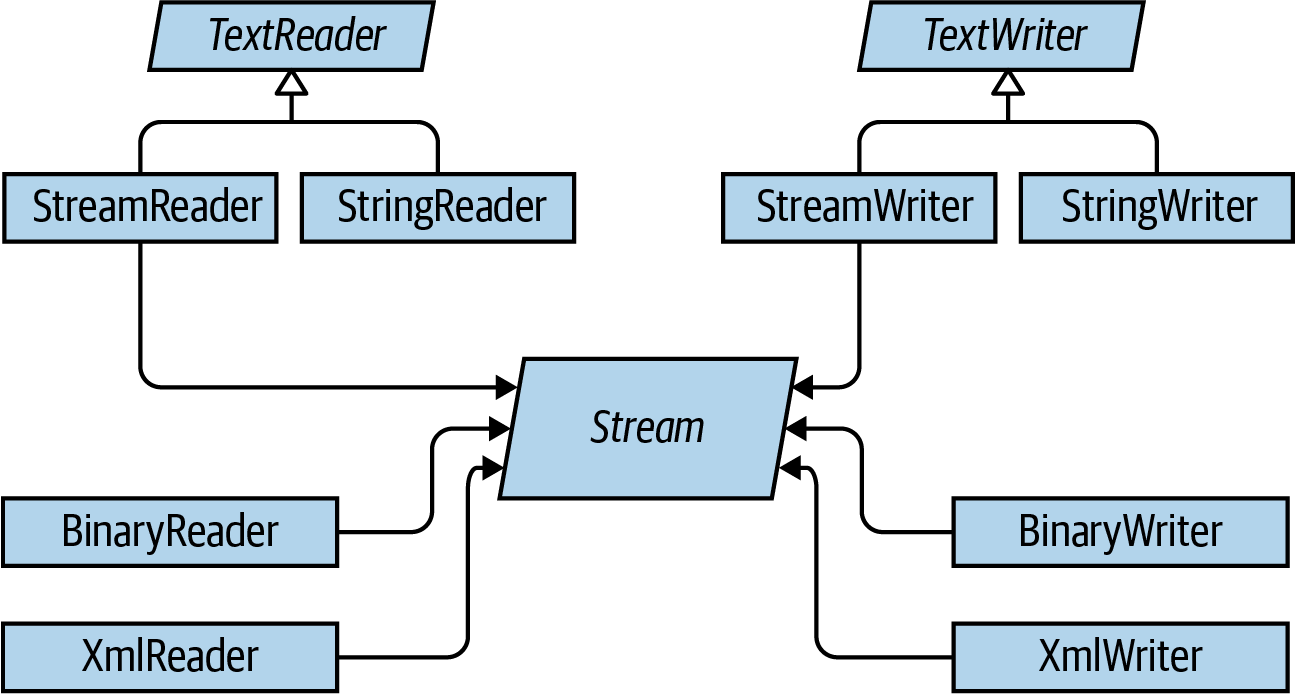

### Text Adapters

***TextReader*** and ***TextWriter*** are the `abstract` base classes for **adapters** that deal exclusively with `characters` and `strings`.  
  
***StreamReader***/***StreamWriter*** are implementation of `TextReader`/`TextWriter` for work with **Text Files**.  
  
***StringReader***/***StringWriter*** are implementation of `TextReader`/`TextWriter` for work with **in-memory strings**.

#### TextReader members
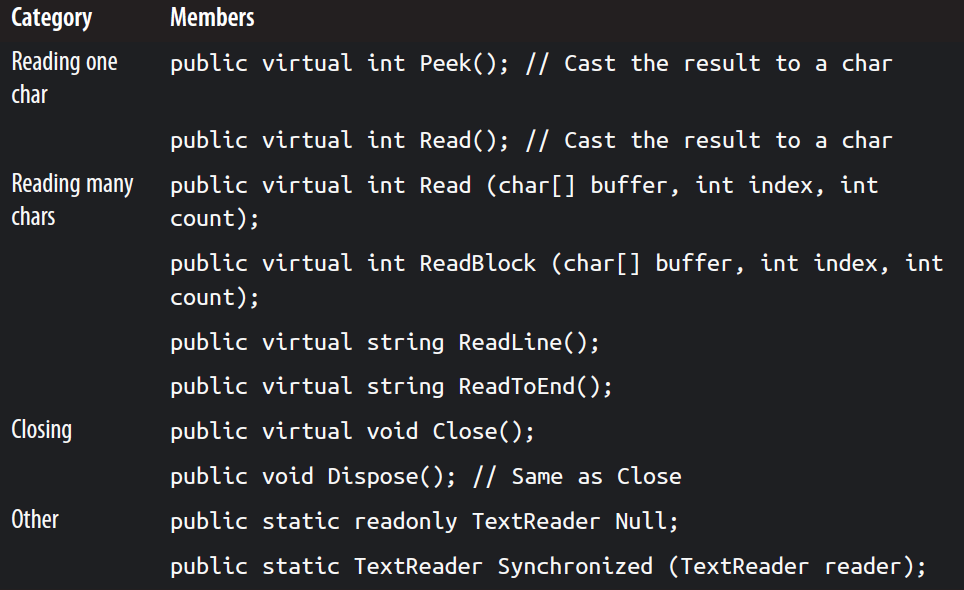

***Peek*** returns the `next character` in the stream `without advancing the position`.  
Both `Peek` and the zero-argument version of `Read` return ***−1*** if at the end of the stream. they return an `integer` that can be `cast directly to a char`.

<div dir="rtl" style="width:90%; margin:auto">
<code>ReadLine</code>  موارد زیر را به عنوان انتهای خط در نظر می‌گیرد:
<ol><li><strong>کاراکتر CR (Carriage Return)</strong>: که کد ASCII آن 13 است و معمولاً به صورت <code>\r</code> نمایش داده می‌شود.</li><li><strong>کاراکتر LF (Line Feed)</strong>: که کد ASCII آن 10 است و معمولاً به صورت <code>\n</code> نمایش داده می‌شود.</li><li><strong>ترکیب CR+LF (Carriage Return + Line Feed)</strong>: که به صورت توالی <code>\r\n</code> نمایش داده می‌شود.</li></ol>
</div>

***Environment.NewLine*** returns the `new-line` sequence for the `current OS`.  

On ***Windows***, this is `\r\n`, On **Unix** and **macOS**, it’s simply `\n`.

#### TextWriter members
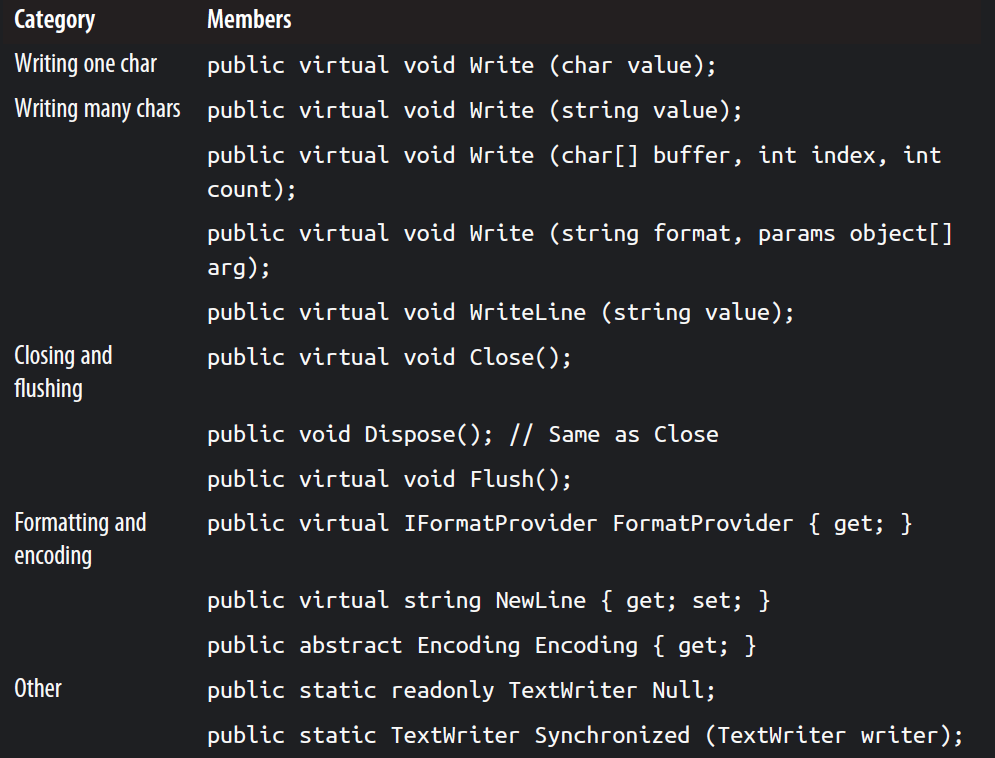

***WriteLine*** simply `appends` the given text with `Environment.NewLine`.

### StreamReader and StreamWriter

In [ ]:
using System.IO;

using (FileStream fs = File.Create ("test.txt"))
using (TextWriter writer = new StreamWriter (fs))
{
    writer.WriteLine ("Line1");
    writer.WriteLine ("Line2");
}

using (FileStream fs = File.OpenRead ("test.txt"))
using (TextReader reader = new StreamReader (fs))
{
    Console.WriteLine (reader.ReadLine()); // Line1
    Console.WriteLine (reader.ReadLine()); // Line2
}

Because ***text adapters*** are so often **coupled** with `files`, the File class provides the static methods `CreateText`, `AppendText`, and `OpenText` to **shortcut** the process:

In [ ]:
using System.IO;

using (TextWriter writer = File.CreateText ("test.txt"))
{
    writer.WriteLine ("Line1");
    writer.WriteLine ("Line2");
}

using (TextWriter writer = File.AppendText ("test.txt"))
    writer.WriteLine ("Line3");

using (TextReader reader = File.OpenText ("test.txt"))
    while (reader.Peek() > -1)// test end of file , we can use reader.ReadLine is null
        Console.WriteLine (reader.ReadLine());  // Line1
                                                // Line2
                                                // Line3

### Character encodings

The ***StreamReader*** and ***StreamWriter*** types, however, are connected to an underlying `byte-oriented` stream, so they must ***convert*** between `characters` and `bytes`.  
  
They do so through an ***Encoding*** class from the `System.Text` namespace, which you choose when **constructing** the `StreamReader` or `StreamWriter`. If you choose **none**, the **default** `UTF-8` encoding is used

<div dir="rtl" style="width:90%; margin:auto">
<p>Character encoding یکی از اجزای کلیدی در ذخیره&zwnj;سازی و نمایش متن در کامپیوترها است. این روش&zwnj;ها تعیین می&zwnj;کنند که چگونه کاراکترهای متنی به بایت&zwnj;های دیجیتال تبدیل می&zwnj;شوند تا توسط کامپیوتر قابل پردازش و نمایش باشند. در زیر به برخی از رایج&zwnj;ترین انواع کدگذاری&zwnj;های کاراکترها و مفاهیم مرتبط با آن&zwnj;ها اشاره می&zwnj;کنم:</p><h3>ASCII (American Standard Code for Information Interchange)</h3><p><strong>تعریف:</strong></p><ul><li>ASCII یک استاندارد اولیه برای کدگذاری کاراکترها است که شامل 128 کاراکتر اولیه است. این کدگذاری شامل حروف انگلیسی بزرگ و کوچک، اعداد، علائم نگارشی و برخی کاراکترهای کنترل است.</li></ul><p><strong>ویژگی&zwnj;ها:</strong></p><ul><li>هر کاراکتر ASCII با یک بایت (8 بیت) کدگذاری می&zwnj;شود، اما تنها 7 بیت استفاده می&zwnj;شود که مقادیر 0 تا 127 را پوشش می&zwnj;دهد.</li></ul><h3>Extended ASCII</h3><p><strong>تعریف:</strong></p><ul><li>برای پشتیبانی از کاراکترهای اضافی، کدگذاری&zwnj;های ASCII توسعه&zwnj;یافته معرفی شدند که از بیت هشتم نیز استفاده می&zwnj;کنند.</li></ul><p><strong>ویژگی&zwnj;ها:</strong></p><ul><li>Extended ASCII از 256 کاراکتر پشتیبانی می&zwnj;کند (0 تا 255)، که شامل کاراکترهای زبان&zwnj;های اروپایی، کاراکترهای گرافیکی و نمادهای خاص است.</li></ul><h3>ISO 8859</h3><p><strong>تعریف:</strong></p><ul><li>ISO 8859 یک خانواده از استانداردهای کدگذاری است که هر کدام برای زبان&zwnj;ها و مناطق خاصی طراحی شده&zwnj;اند.</li></ul><p><strong>ویژگی&zwnj;ها:</strong></p><ul><li>هر کاراکتر در ISO 8859 با یک بایت کدگذاری می&zwnj;شود.</li><li>برای مثال، ISO 8859-1 (Latin-1) برای زبان&zwnj;های اروپای غربی استفاده می&zwnj;شود.</li></ul><h3>Unicode</h3><p><strong>تعریف:</strong></p><ul><li>Unicode یک استاندارد جامع برای کدگذاری تمام کاراکترهای زبان&zwnj;های مختلف جهان است.</li></ul><p><strong>ویژگی&zwnj;ها:</strong></p><ul><li>Unicode شامل بیش از 140,000 کاراکتر است.</li><li>از چندین روش کدگذاری مختلف استفاده می&zwnj;کند:</li></ul><h3>UTF-8 (Unicode Transformation Format - 8-bit)</h3><p><strong>ویژگی&zwnj;ها:</strong></p><ul><li>UTF-8 یک کدگذاری متغیر طول است که از یک تا چهار بایت برای هر کاراکتر استفاده می&zwnj;کند.</li><li>با ASCII سازگار است، یعنی کاراکترهای ASCII همان کد بایت&zwnj;ها را در UTF-8 دارند.</li><li>بسیار کارآمد است و بیشتر در وب استفاده می&zwnj;شود.</li></ul><h3>UTF-16</h3><p><strong>ویژگی&zwnj;ها:</strong></p><ul><li>UTF-16 از دو بایت (16 بیت) برای اکثر کاراکترهای رایج استفاده می&zwnj;کند، اما برای کاراکترهای نادر می&zwnj;تواند از چهار بایت استفاده کند.</li><li>بیشتر در سیستم&zwnj;عامل&zwnj;های مدرن و برنامه&zwnj;های کاربردی استفاده می&zwnj;شود.</li></ul><h3>UTF-32</h3><p><strong>ویژگی&zwnj;ها:</strong></p><ul><li>UTF-32 از چهار بایت (32 بیت) برای هر کاراکتر استفاده می&zwnj;کند.</li><li>ساده&zwnj;ترین کدگذاری است زیرا هر کاراکتر دقیقا یک طول دارد، اما بسیار غیربهینه از نظر فضای ذخیره&zwnj;سازی است.</li></ul><h3>نحوه انتخاب کدگذاری مناسب</h3><ul><li><strong>سازگاری:</strong> برای اطمینان از سازگاری با سیستم&zwnj;ها و برنامه&zwnj;های دیگر، UTF-8 معمولاً بهترین انتخاب است.</li><li><strong>کارآیی:</strong> اگر نیاز به پردازش کاراکترها با طول ثابت دارید، UTF-32 می&zwnj;تواند مناسب باشد، هرچند که فضای بیشتری مصرف می&zwnj;کند.</li><li><strong>حوزه زبانی:</strong> اگر برنامه شما تنها با زبان&zwnj;های خاصی کار می&zwnj;کند، استفاده از کدگذاری خاص آن زبان (مثلاً ISO 8859-1 برای زبان&zwnj;های اروپای غربی) می&zwnj;تواند مناسب باشد.</li></ul><h3>نتیجه&zwnj;گیری</h3><p>کدگذاری کاراکترها یک بخش اساسی از پردازش متن در کامپیوترها است. انتخاب کدگذاری مناسب بستگی به نیازهای خاص پروژه شما دارد، از جمله نیاز به سازگاری، کارآیی و محدوده زبانی. فهم دقیق این کدگذاری&zwnj;ها و تفاوت&zwnj;های آن&zwnj;ها می&zwnj;تواند به بهبود عملکرد و تطابق بهتر برنامه&zwnj;های شما کمک کند.</p>


</div>

In [4]:
using System.IO;

using (TextWriter w = File.CreateText ("but.txt")) // Use default UTF-8
    w.WriteLine ("but—"); // encoding. em dash

using (Stream s = File.OpenRead ("but.txt"))
    for (int b; (b = s.ReadByte()) > -1;)
        Console.WriteLine (b);


98
117
116
226
128
148
13
10


UTF-8 is efficient with the **Western alphabet** as most popular characters `consume just one byte`. 

<div dir="rtl" style="width:90%; margin:auto">
<p><strong>مشکل در جستجو:</strong> یکی از معایب UTF-8 این است که جستجو و یافتن موقعیت یک کاراکتر در یک جریان بایت مشکل است. در UTF-8، هر کاراکتر ممکن است بین 1 تا 4 بایت طول داشته باشد. بنابراین، موقعیت یک کاراکتر در جریان بایت با موقعیت آن در متن یکسان نیست. به عبارت دیگر، اگر بخواهید به کاراکتر پنجم متن دسترسی پیدا کنید، نمی‌توانید به سادگی به بایت پنجم بروید، زیرا ممکن است کاراکترهای قبل از آن بیش از یک بایت مصرف کرده باشند.</p>
</div>

An ***alternative*** is `UTF-16`. it uses either `two` or `four` bytes ***per character***.  
  
because the **C#** `char` type is itself `only 16 bits` wide, a UTF-16 encoding will always use `exactly two bytes` per .NET char. This makes it easy to `jump` to a `particular character index` within a stream

In [ ]:
using System.IO;

using (Stream s = File.Create ("but.txt"))
using (TextWriter w = new StreamWriter (s, Encoding.Unicode))
w.WriteLine ("but-");

foreach (byte b in File.ReadAllBytes ("but.txt"))
    Console.WriteLine (b);

/*
255 // Byte-order mark 1
254 // Byte-order mark 2
98  // 'b' byte 1
0   // 'b' byte 2
117 // 'u' byte 1
0   // 'u' byte 2
116 // 't' byte 1
0   // 't' byte 2
20  // '--' byte 1
32  // '--' byte 2
13  // <CR> byte 1
0   // <CR> byte 2
10  // <LF> byte 1
0   // <LF> byte 2
*/

<div dir="rtl" style="width:90%; margin:auto">
<h4> ترتیب بایت‌ها (Endianness)</h4>

<p>در کامپیوترها، ترتیب بایت‌ها یا "Endianness" به نحوه ذخیره‌سازی و انتقال بایت‌ها در حافظه اشاره دارد. دو نوع ترتیب بایت وجود دارد:</p>

<ul><li><strong>Little-endian</strong>: در این ترتیب، کم ارزش‌ترین بایت (least significant byte) ابتدا ذخیره می‌شود. برای مثال، اگر عددی مانند 0x1234 را به صورت little-endian ذخیره کنیم، بایت‌ها به ترتیب 0x34 و 0x12 در حافظه ذخیره می‌شوند.</li><li><strong>Big-endian</strong>: در این ترتیب، پر ارزش‌ترین بایت (most significant byte) ابتدا ذخیره می‌شود. برای مثال، اگر عددی مانند 0x1234 را به صورت big-endian ذخیره کنیم، بایت‌ها به ترتیب 0x12 و 0x34 در حافظه ذخیره می‌شوند.</li></ul>

<h4>3. پیشوند بایت (Byte Order Mark)</h4>
<p>برای اینکه ترتیب بایت‌ها در UTF-16 مشخص شود، یک پیشوند بایت (Byte Order Mark یا BOM) به ابتدای فایل یا جریان داده اضافه می‌شود. این پیشوند به شکل زیر است:</p>

<ul><li><strong>BOM برای little-endian</strong>: <code>0xFFFE</code> (دو بایت: 0xFF و 0xFE)</li><li><strong>BOM برای big-endian</strong>: <code>0xFEFF</code> (دو بایت: 0xFE و 0xFF)</li></ul>

</div>

### StringReader and StringWriter

<div dir="rtl" style="width:90%; margin:auto">
<p>برخلاف کلاس‌های <code>StreamReader</code> و <code>StreamWriter</code> که روی یک جریان بایت (مانند یک فایل یا شبکه) کار می‌کنند، <code>StringReader</code> و <code>StringWriter</code> مستقیماً با رشته‌ها کار می‌کنند. این بدان معناست که نیازی به ترجمه بایت‌ها به کاراکترها (و بالعکس) نیست.</p>

<h4>مقایسه با استفاده از رشته و StringBuilder همراه با متغیر شاخص</h4>
<p>بدون استفاده از <code>StringReader</code> و <code>StringWriter</code>، شما می‌توانید با استفاده از یک رشته یا <code>StringBuilder</code> و یک متغیر شاخص به طور دستی عملیات خواندن و نوشتن را انجام دهید. به عنوان مثال، می‌توانید با استفاده از متدهای <code>Substring</code> و <code>Append</code> به ترتیب خواندن و نوشتن از/به رشته یا <code>StringBuilder</code> را انجام دهید.</p>

<p>اما این کلاس‌ها مزایای خاصی دارند:</p>
<ul><li><strong>سهولت استفاده</strong>: <code>StringReader</code> و <code>StringWriter</code> متدهایی مانند <code>ReadLine</code>, <code>WriteLine</code> و غیره را ارائه می‌دهند که خواندن و نوشتن متن را ساده‌تر و قابل فهم‌تر می‌کنند.</li><li><strong>سازگاری با API‌های دیگر</strong>: این کلاس‌ها از کلاس‌های پایه‌ای <code>TextReader</code> و <code>TextWriter</code> به ارث می‌برند، که به شما اجازه می‌دهد از آنها در مکان‌هایی که از <code>StreamReader</code> و <code>StreamWriter</code> استفاده می‌کنید، بهره ببرید. این امر به سازگاری و قابلیت استفاده مجدد کد کمک می‌کند.</li></ul>
</div>

### Binary Adapters

***BinaryReader*** and ***BinaryWriter*** read and write native data types: `bool`, `byte`, `char`, `decimal`, `float`, `double`, `short`, `int`, `long`, `sbyte`, `ushort`, `uint`, and `ulong`, as well as `strings` and `arrays of the primitive data types`.

In [ ]:
using System;
using System.IO;

class Program
{
    static void Main()
    {
        // Writing binary data to a file
        using (FileStream fs = new FileStream("example.bin", FileMode.Create))
        using (BinaryWriter writer = new BinaryWriter(fs))
        {
            writer.Write(1.25);    // Write a double
            writer.Write(123);     // Write an int
            writer.Write("Hello"); // Write a string
        }

        // Reading binary data from a file
        using (FileStream fs = new FileStream("example.bin", FileMode.Open))
        using (BinaryReader reader = new BinaryReader(fs))
        {
            double d = reader.ReadDouble();
            int i = reader.ReadInt32();
            string s = reader.ReadString();

            Console.WriteLine($"Read values: {d}, {i}, {s}");
        }
    }
}


<div dir="rtl" style="width:90%; margin:auto">
<h4>کاربردهای Binary Adapters</h4>

<h5>1. ذخیره‌سازی و بازیابی داده‌ها به فرمت باینری</h5>
<p>Binary adapters به شما اجازه می‌دهند که داده‌ها را به صورت باینری ذخیره کنید و بعداً آن‌ها را بازیابی کنید. این روش معمولاً در موارد زیر استفاده می‌شود:</p>
<ul><li>ذخیره‌سازی تنظیمات برنامه یا داده‌های پیچیده در فایل‌ها.</li><li>ساخت و خواندن فایل‌های داده سفارشی.</li></ul>

<h5>2. شبکه و ارتباطات</h5>
<p>در ارتباطات شبکه‌ای، داده‌ها معمولاً به صورت باینری ارسال و دریافت می‌شوند. <code>BinaryReader</code> و <code>BinaryWriter</code> می‌توانند برای خواندن و نوشتن داده‌های باینری در جریان‌های شبکه‌ای استفاده شوند.</p>

<h5>3. خواندن و نوشتن فایل‌های باینری</h5>
<p>فایل‌های باینری مانند تصاویر، فایل‌های صوتی، و فایل‌های ویدیویی نیازمند خواندن و نوشتن به صورت باینری هستند. <code>BinaryReader</code> و <code>BinaryWriter</code> ابزارهایی مناسب برای این کار هستند.</p>

<h5>4. سریال‌سازی و دسریال‌سازی سفارشی</h5>
<p>در برخی موارد، ممکن است نیاز داشته باشید که داده‌ها را به فرمت باینری سفارشی سریال‌سازی (تبدیل به باینری) و دسریال‌سازی (بازگردانی به شکل اولیه) کنید. این کلاس‌ها می‌توانند به این فرآیند کمک کنند.</p>
</div>